# Getting Started

This page shows how to use the BBOB functions via the registries, pick deterministic or randomized problem instances, and work with plotting helpers.

- Prerequisite: install the package (see [Installation](installation.md)).
- API reference: see [API Reference](api.md).

## Quick Usage

In [1]:
import jax
import jax.numpy as jnp
import jax.random as jr
from bbob_jax import registry

# Choose a function by name in the registry, and create the function by calling it with the dimenionality (`ndim`) and a random key (`key)`:
key = jr.key(0)
fn, f_opt = registry["sphere"](ndim=2, key=key)

x = jnp.zeros((2,))  # 2D input
val = fn(x)
print(float(val))

616.7059936523438


## Deterministic vs. Randomized

Two registries are available:

- `registry`: randomized instance; creates with `registory[<fn_name>](ndim=<dim>, key=<key>)`.
- `registry_original`: deterministic (no shift/rotation/offset); call as `fn(x)`.

Both returning registries produce function objects that can be called with just the decision vector `x`.

In [2]:
from bbob_jax import registry, registry_original
import jax.numpy as jnp
import jax.random as jr

x = jnp.zeros((5,))

# Randomized instance (shift, rotations, and fopt applied)
fn_rand, global_min_rand = registry["rastrigin"](ndim=5, key=jr.key(0))
val_rand = fn_rand(x)

print(f"Objective function value at {x}: {val_rand}")

# Deterministic/original (no shift/rotation/fopt)

fn_det, global_min_det = registry_original["rastrigin"](ndim=5)
val_det = fn_det(x)

print(f"Objective function value at {x}: {val_det}")

Objective function value at [0. 0. 0. 0. 0.]: 2267.5234375
Objective function value at [0. 0. 0. 0. 0.]: 0.0


## Evaluate Many Points (jit/vmap)

You can JIT-compile functions and batch-evaluate points with `vmap`:

In [3]:
import jax
import jax.numpy as jnp
import jax.random as jr
from bbob_jax import registry

fn_rosen, global_min = registry["rosenbrock"](ndim=2, key=jr.key(0))

# Same randomized instance across all points: pass the same key
X = jnp.stack(
    [
        jnp.array([1.0, 1.0]),
        jnp.array([0.5, -0.5]),
        jnp.array([2.0, 2.0]),
    ]
)

batched = jax.vmap(fn_rosen)
compiled = jax.jit(batched)
vals = compiled(X)
print(vals)

[2202.23    834.8828 3598.2253]


If you want a different instance per evaluation (usually not desired within a single batch), you could pass different keys per row.

## List Available Functions

In [4]:
from bbob_jax import registry

print(sorted(registry.keys()))

['attractive_sector', 'bent_cigar', 'discuss', 'ellipsoid', 'ellipsoid_seperable', 'gallagher_101_peaks', 'gallagher_21_peaks', 'griewank_rosenbrock_f8f2', 'katsuura', 'linear_slope', 'lunacek_bi_rastrigin', 'rastrigin', 'rastrigin_seperable', 'rosenbrock', 'rosenbrock_rotated', 'schaffer_f7_condition_10', 'schaffer_f7_condition_1000', 'schwefel_xsinx', 'sharp_ridge', 'skew_rastrigin_bueche', 'sphere', 'step_ellipsoid', 'sum_of_different_powers', 'weierstrass']


## Filter by Function Characteristics

`function_characteristics` provides simple tags (e.g., `separable`, `unimodal`).

In [5]:
from bbob_jax import function_characteristics

separable = [
    name
    for name, tags in function_characteristics.items()
    if tags.get("separable")
]
print(separable)

['sphere', 'ellipsoid_seperable', 'rastrigin_seperable', 'skew_rastrigin_bueche', 'linear_slope']


## Plotting Utilities (optional)

Install plotting extras and use the helpers to visualize a function:

```bash
pip install "bbob-jax[plot]"
```

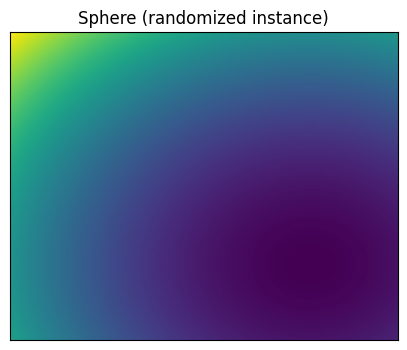

In [6]:
import jax.random as jr
import matplotlib.pyplot as plt
from bbob_jax import registry
from bbob_jax.plotting import plot_2d

key = jr.key(0)
# fn_sphere, _ = registry["sphere"](ndim=2, key=key)

fig, ax = plt.subplots(figsize=(5, 4))
plot_2d(
    registry["sphere"],
    bounds=(-5.0, 5.0),
    key=key,
    px=200,
    ax=ax,
    log_norm=False,
)
ax.set_title("Sphere (randomized instance)")
plt.show()

See the plotting API in [API Reference](api.md) under "Plotting Utilities".

## Advanced: Under-the-hood Signatures

Internally, the raw functions are defined as `fn(x, x_opt, R, Q)` and the registries handle building these parameters for you (plus adding an offset `fopt` to the randomized variant). Prefer using `registry`/`registry_original` from the public API rather than calling internal functions directly.